In [42]:
import  pandas as pd
import numpy as np

In [43]:
DATA_PATH = r'E:\Project4\Processed_Flipdata.csv'
data = pd.read_csv(DATA_PATH)

In [44]:
data.shape

(541, 12)

In [45]:
data.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"


In [46]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [47]:
print(data['Prize'].dtype)
print(data['Prize'].nunique())

object
158


In [48]:
data['Prize']=data['Prize'].str.replace(',','').astype(int)

1. Initial Data Type: The 'Prize' column values were stored as strings, likely due to the presence of commas (e.g., '10,999').
2. Comma Removal: The str.replace(',', '') method removes commas from the string values, resulting in clean numerical strings (e.g., '10999').

Benefits:
- Enables statistical calculations (e.g., mean, median, standard deviation) on the 'Prize' column.
- Facilitates data visualization and exploration.
- Prepares data for machine learning model training.

In [49]:
data.dtypes

Model             object
Colour            object
Memory             int64
RAM                int64
Battery_           int64
Rear Camera       object
Front Camera      object
AI Lens            int64
Mobile Height    float64
Processor_        object
Prize              int64
dtype: object

In [50]:
data.isnull().sum()

Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

In [51]:
data.describe()

,Memory,RAM,Battery_,AI Lens,Mobile Height,Prize
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,110.550832,5.397412,4871.587800,0.062847,16.431201,16228.375231
std,60.600694,1.984923,780.148862,0.242911,2.523553,10793.588322
min,16.000000,2.000000,800.000000,0.000000,4.500000,920.000000
25%,64.000000,4.000000,5000.000000,0.000000,16.510000,9290.000000
50%,128.000000,6.000000,5000.000000,0.000000,16.710000,13499.000000
75%,128.000000,8.000000,5000.000000,0.000000,16.940000,19280.000000
max,256.000000,8.000000,7000.000000,1.000000,41.940000,80999.000000


The dataset shows varying characteristics across mobile phones.
- Memory averages 110.55 GB, with a median of 128 GB and significant variability (std: 60.6 GB).
- RAM averages 5.397 GB, with most phones having 4-8 GB.
- Battery capacity averages 4871.587 mAh, primarily ranging from 5000-7000 mAh.
- AI Lens is mostly absent (0), with few phones having it (1).
- Mobile Height averages 16.431 cm, with minimal variation.
- Prize ranges widely (920-80999), averaging 16228.


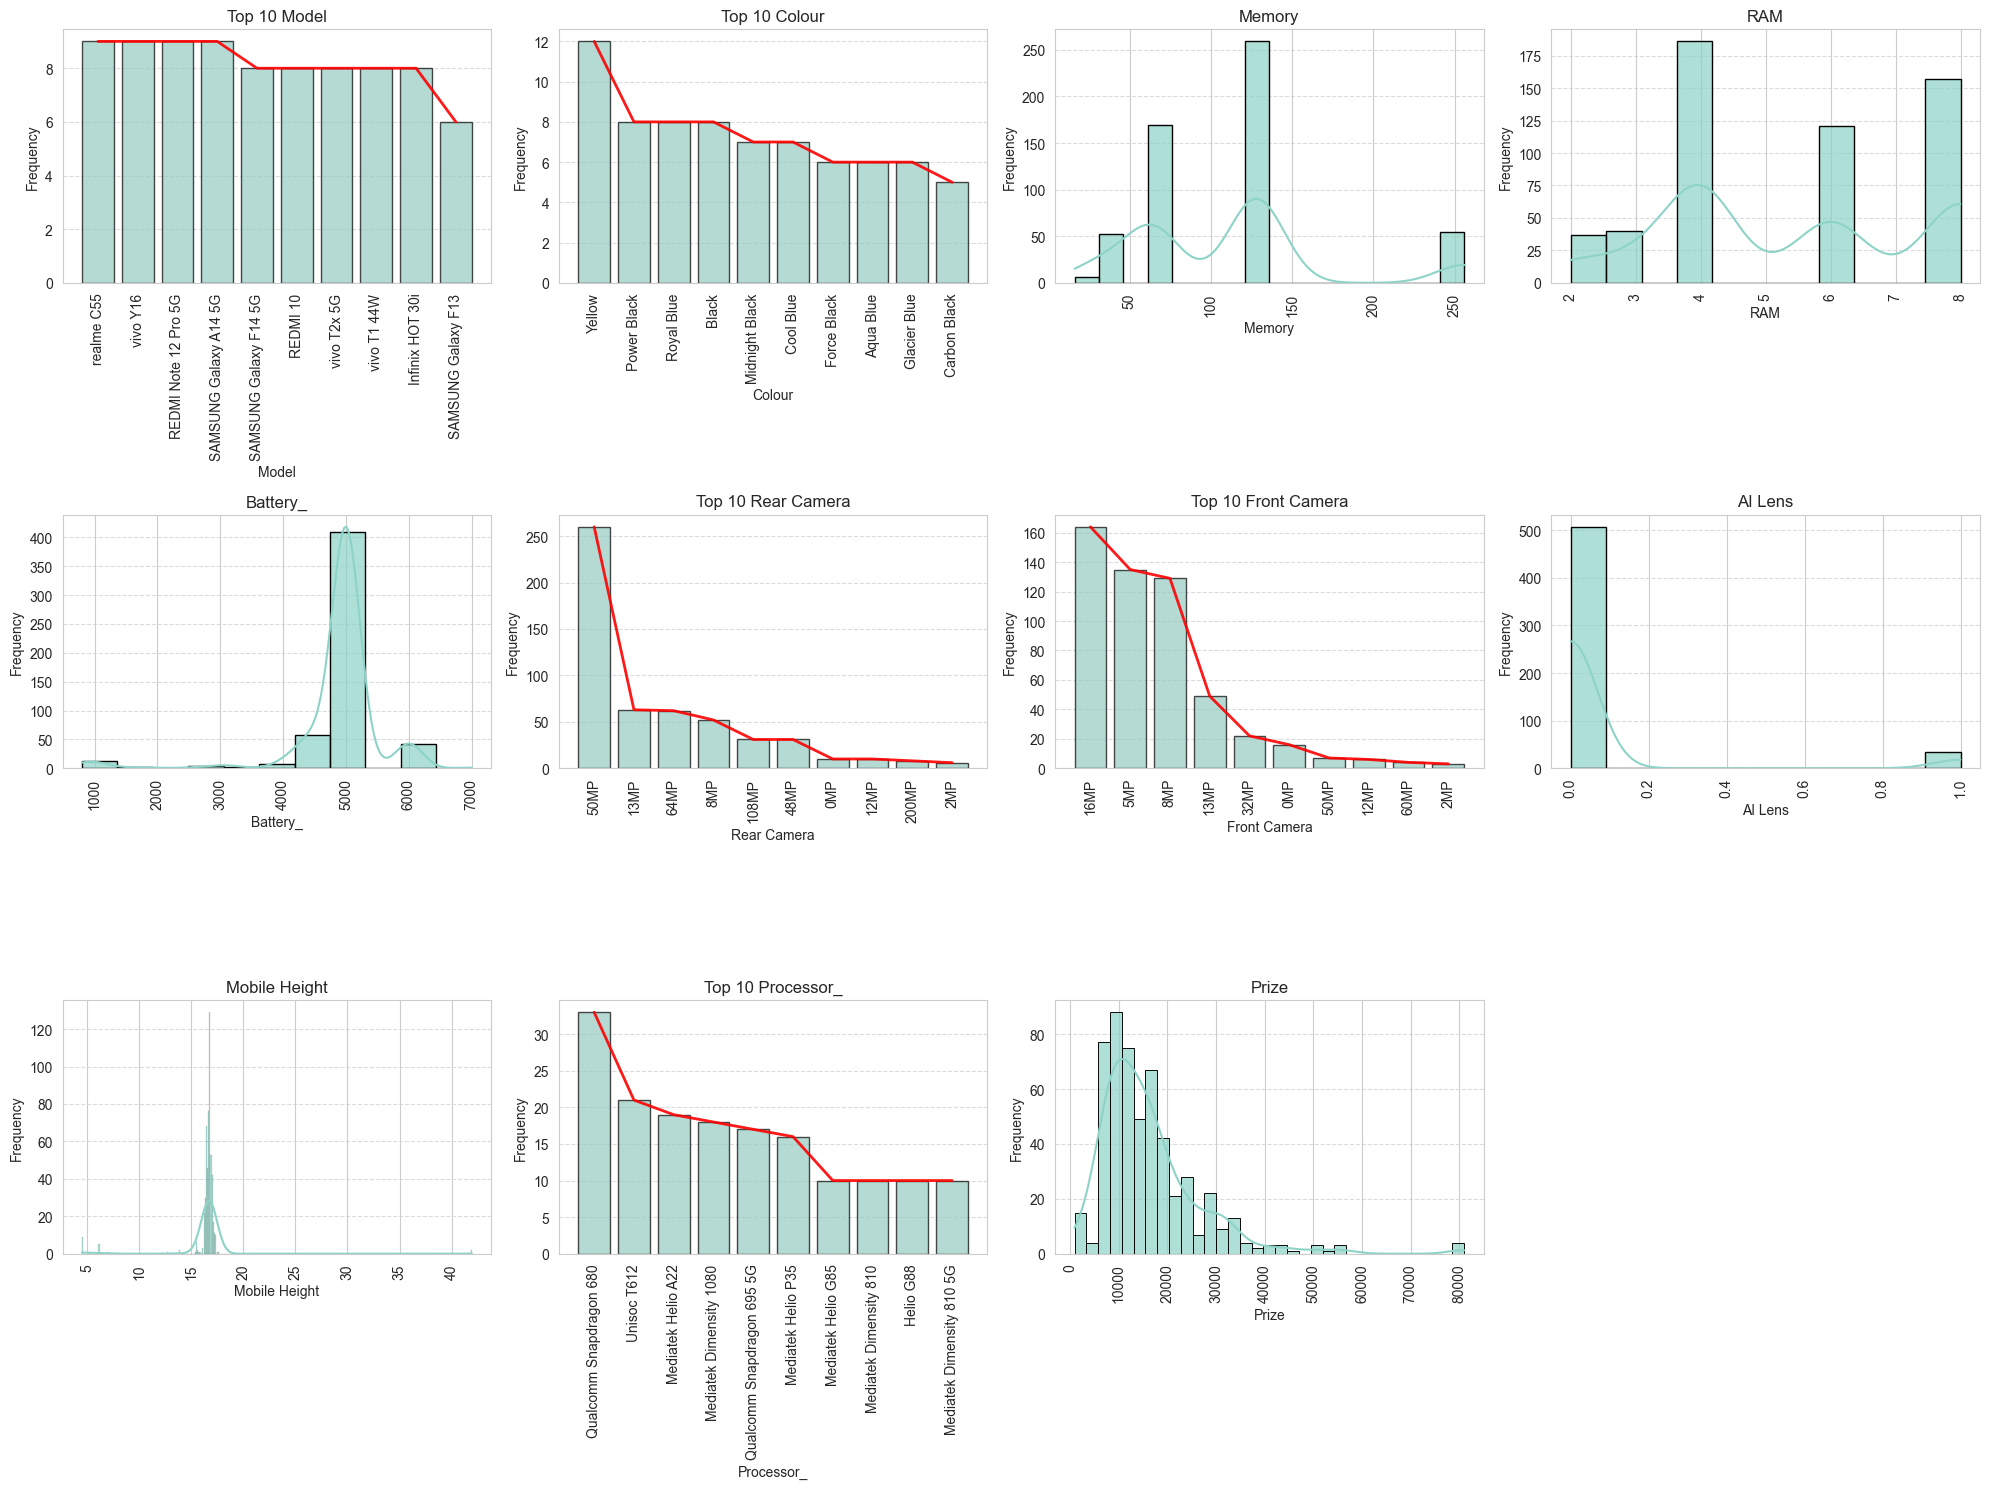

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style('whitegrid')

# Define columns
columns = data.columns.tolist()

n_rows = (len(columns) + 3) // 4
n_cols = 4

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 15))

for i, column in enumerate(columns):
    ax = axes[i // 4, i % 4]
    
    if data[column].dtype == 'object':
        top_10 = data[column].value_counts().index[:10]
        sns.barplot(x=top_10, y=data[column].value_counts().values[:10], ax=ax, alpha=0.7, edgecolor='black')
        ax.set_title(f'Top 10 {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
        ax.tick_params(axis='x', labelrotation=90, labelsize=10)
        ax.tick_params(axis='y', labelsize=10)
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        x = np.arange(len(top_10))
        y = data[column].value_counts().values[:10]
        ax.plot(x, y, color='red', alpha=0.9, label='Trend', linewidth=2)
    else:
        sns.histplot(data[column], ax=ax, kde=True, alpha=0.7, edgecolor='black')
        ax.set_title(column)
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
        ax.tick_params(axis='x', labelrotation=90, labelsize=10)
        ax.tick_params(axis='y', labelsize=10)
        ax.grid(axis='y', linestyle='--', alpha=0.7)

for i in range(len(columns), n_rows * n_cols):
    fig.delaxes(axes[i // n_cols, i % n_cols])

plt.tight_layout()
plt.show()

The graphical representation illustrates the distribution of various smartphone features.

- Model: The frequency of models decreases progressively, with the first four models showing similar frequencies, followed by a gradual decline.
- Colour: The popularity of colours decreases sequentially, with yellow being the most frequent initially.
- Memory: The frequency increases initially, peaks, and then decreases.
- RAM: The frequency fluctuates, starting low, increasing, decreasing, and increasing again.
- Battery: The frequency begins extremely low, increases slightly, then significantly, and finally decreases.
- Rear Camera: The frequency decreases steadily from a high initial value.
- Front Camera: The frequency starts high and decreases gradually.
- AI Lens: The frequency begins high but drops to almost zero, with a slight increase at the end.
- Mobile Height: The frequency starts near zero, drops to zero, then surges drastically, and finally returns to zero.
- Processor: The frequency starts extremely high and decreases gradually.
- Price: The frequency begins moderately, dips, then increases sharply, decreases to zero, and finally exhibits a slight, minimal increase.

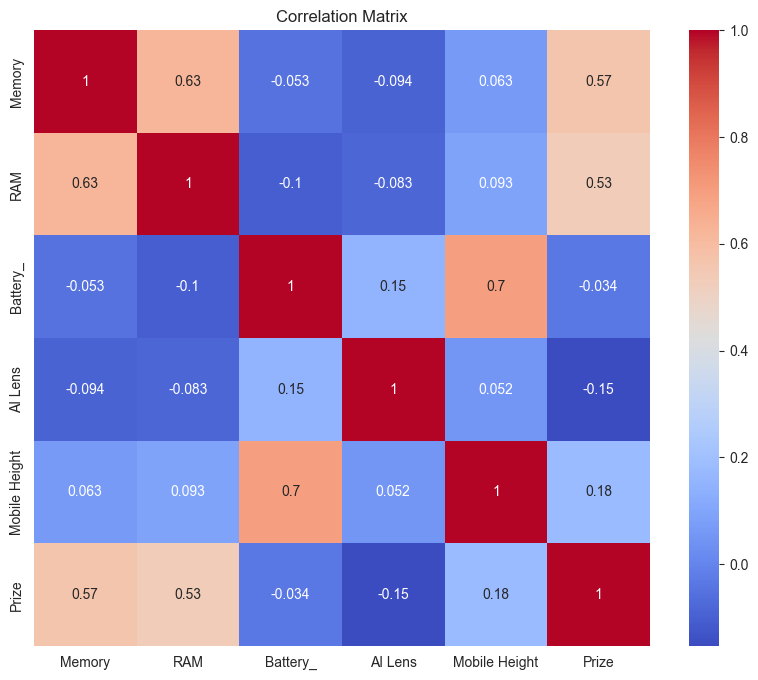

In [53]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
corr = data[numerical_cols].corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

1. Mobile Height: Moderate positive correlation (0.18). Taller mobiles tend to be more expensive.
2. AI Lens: Weak negative correlation (-0.15). Presence of AI Lens slightly decreases price.
3. Battery: Very weak negative correlation (-0.034). Battery capacity has minimal impact on price.
4. RAM: Strong positive correlation (0.53). Higher RAM capacity significantly increases price.
5. Memory: Strong positive correlation (0.57). Larger storage capacity strongly increases price.

- Focus on RAM and Memory as key drivers of price.
- Consider Mobile Height as a contributing factor.
- AI Lens and Battery capacity have limited impact on price.

----------------------------------------------------------------------------------------------

- Initially, we had a dataset with a 'Colour' column containing various colour names.
- To simplify the analysis and reduce the dimensionality of the data, 
- we manually reviewed the unique colour names and grouped them into categories based on their similarities.

In [54]:
colour_categories = {
    "Black": ["Black", "Matte Black", "Obsidian Black", "Onyx Black", "Phantom Black", "Pure Black", "Steel Black", "Submariner Black", "Night Black", "Mirror Black"],
    "White": ["White", "Pearl White", "Starlight White", "Lucent White", "Frost White", "Glacier White", "Halo White", "Alpine White", "Pearl"],
    "Blue": ["Blue", "Azure Blue", "Baby Blue", "Cool Blue", "Cosmic Blue", "Cyan", "Denim", "Exploratory Blue", "Glacier Blue", "Iceberg Blue", "Light Blue", "Magic Blue", "Marine Blue", "Nebula Blue", "Pacific Blue", "Prism Blue", "Royal Blue", "Sapphire Blue", "Sky Blue", "Stardust Blue", "Steel Blue", "Stripe Blue", "Sunrise Blue", "Surfing Blue", "Turquoise", "Turquoise Cyan", "Tuscany Blue", "Uyuni Blue", "Velocity Wave", "Waterfall Blue"],
    "Red": ["Red", "Coral Red", "Flame Red", "Scarlet Red"],
    "Green": ["Green", "Aquamarine Green", "Atlantic Green", "Bamboo Green", "Caribbean Green", "Coral Green", "Country Green", "Emerald Green", "Forest Green", "Frosted Green", "Glacial Green", "GOAT Green", "Jade Green", "Light Green", "Lime Green", "Mint Green", "Nightsky Green", "Olive Green", "Opal Green", "Oxygen Green", "Playful Green", "Prism Green", "Rainforest Green", "Sea Green", "Supernova Green"],
    "Yellow": ["Yellow", "Coral Yellow", "Lemon"],
    "Orange": ["Orange", "Coral Orange", "Orange Shimmer", "Peach", "Sunset Orange", "Marigold"],
    "Purple": ["Purple", "Aurora Purple", "B.A.E. Purple", "Jade Purple", "Lavender", "Nebula Purple", "Peppy Purple", "Phantom Purple", "Stardust Purple", "Starlight Purple", "Violet"],
    "Gray": ["Gray", "Carbon Gray", "Charcoal Gray", "Cool Gray", "Cosmic Gray", "Dark Gray", "Deep Gray", "Glacier Gray", "Light Gray", "Matte Gray", "Meteor Gray", "Mineral Gray", "Mithril", "Nebula Gray", "Onyx Gray", "Shadow Gray", "Slate Gray", "Steel Gray", "Storm Gray", "Twilight Gray"],
    "Silver": ["Silver", "Blade Silver", "Glitter", "Metallic Silver", "Quick Silver", "Racing Silver", "Satin Silver", "Shimmer", "Sparkle"],
    "Gold": ["Gold", "Aurora Gold", "Copper", "Dawn Gold", "Metallic Gold", "Sandy Gold", "Solar Gold", "Sunrise Gold", "Tahiti Gold"],
    "Brown": ["Brown"],
    "Pink": ["Pink", "Coral Pink", "Rose"],
    "Other": ["Cream", "Glossy", "Icy"]
}

colour_map = {}
for i, (category, colours) in enumerate(colour_categories.items()):
    for colour in colours:
        colour_map[colour] = i

# Replace NaN values in 'Colour' column
data['Colour'] = data['Colour'].fillna('Other')


In [55]:
data['Colour'] = data['Colour'].map(lambda x: next((k for k, v in colour_categories.items() if x in v), 'Unknown'))
colour_categories['Unknown'] = ['Unknown']

In [56]:
one_hot_colour = pd.get_dummies(data['Colour'], prefix='Colour')
one_hot_colour = one_hot_colour.astype(int)
data = pd.concat([data, one_hot_colour], axis=1)

In [57]:
data = data.drop('Colour', axis=1)

LabelEncoder to encode the categorical values in the 'Processor_' column into numerical labels.

In [58]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the 'Processor_' column
data['Processor_'] = le.fit_transform(data['Processor_'])


Converting the 'Rear Camera' and 'Front Camera' columns from string values to numerical values by removing the 'MP' suffix and converting to float.

In [59]:
data['Rear Camera'] = data['Rear Camera'].str.replace('MP', '').astype(float)
data['Front Camera'] = data['Front Camera'].str.replace('MP', '').astype(float)

In [60]:
from scipy import stats
z_scores = np.abs(stats.zscore(data[['Battery_', 'Prize', 'Memory', 'RAM','AI Lens','Mobile Height']]))

print(z_scores)

     Battery_     Prize    Memory       RAM   AI Lens  Mobile Height
0    1.447745  0.828051  0.768868  0.704665  3.861575       0.130413
1    1.447745  0.828051  0.768868  0.704665  3.861575       0.130413
2    0.164752  0.392204  0.288203  1.312392  0.258962       0.082816
3    0.164752  0.981061  1.297403  1.713193  0.258962       0.051086
4    0.164752  0.670404  0.288203  1.312392  3.861575       0.130413
..        ...       ...       ...       ...       ...            ...
536  1.246540  5.913663  2.402345  1.312392  0.258962       0.373312
537  2.272935  0.948697  1.297403  1.713193  0.258962       1.479919
538  0.164752  0.578505  0.768868  0.704665  0.258962       0.130413
539  0.164752  2.111596  0.288203  1.312392  0.258962       0.067904
540  0.164752  0.021271  0.288203  0.704665  0.258962       0.090749

[541 rows x 6 columns]


In [61]:
# Robust Scaling for 'AI Lens' and 'Mob Height'
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
data[['AI Lens']] = scaler.fit_transform(data[['AI Lens']])

Min-Max Scaler to scale the numerical features in the dataset.

In [62]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max Scaler
scaler = MinMaxScaler()

# Define columns to scale
columns_to_scale = ['Memory','RAM', 'Battery_','Mobile Height','Rear Camera','Front Camera','AI Lens','Prize'
]

data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

Correlation analysis between features

In [63]:
corr_matrix = data[['Memory', 'RAM', 'Battery_', 'Mobile Height']].corr()
print(corr_matrix)

                 Memory       RAM  Battery_  Mobile Height
Memory         1.000000  0.625284 -0.053210       0.063163
RAM            0.625284  1.000000 -0.104923       0.092951
Battery_      -0.053210 -0.104923  1.000000       0.695641
Mobile Height  0.063163  0.092951  0.695641       1.000000


1. Memory and RAM are closely related, suggesting devices with more memory often have more RAM.
2. Battery capacity is strongly related to mobile height, indicating larger devices tend to have larger batteries.

Calculating the correlation between each feature and the target variable (Prize).

In [64]:
corr_matrix = data[['Memory', 'RAM', 'Battery_', 'Mobile Height','AI Lens', 'Rear Camera', 'Front Camera', 'Prize']].corr()
print(corr_matrix)

                 Memory       RAM  Battery_  Mobile Height   AI Lens  \
Memory         1.000000  0.625284 -0.053210       0.063163 -0.094442   
RAM            0.625284  1.000000 -0.104923       0.092951 -0.082622   
Battery_      -0.053210 -0.104923  1.000000       0.695641  0.150156   
Mobile Height  0.063163  0.092951  0.695641       1.000000  0.052018   
AI Lens       -0.094442 -0.082622  0.150156       0.052018  1.000000   
Rear Camera    0.530615  0.439558  0.198260       0.239883 -0.043597   
Front Camera   0.496865  0.493861  0.032970       0.208012 -0.111779   
Prize          0.566660  0.532024 -0.034297       0.176009 -0.153691   

               Rear Camera  Front Camera     Prize  
Memory            0.530615      0.496865  0.566660  
RAM               0.439558      0.493861  0.532024  
Battery_          0.198260      0.032970 -0.034297  
Mobile Height     0.239883      0.208012  0.176009  
AI Lens          -0.043597     -0.111779 -0.153691  
Rear Camera       1.000000      0

1. Memory and RAM are highly correlated, suggesting they might be redundant features.
2. Mobile Height is strongly correlated with Battery_, indicating a possible relationship between device size and battery capacity.
3. Rear and Front Camera resolutions are highly correlated, which is expected.
4. Prize is moderately correlated with Memory, RAM, and Rear/Front Camera resolutions, suggesting these features contribute to the device's price.

Using mutual information to select the most relevant features for predicting the Prize variable.

In [65]:
from sklearn.feature_selection import mutual_info_regression
import numpy as np

mutual_info = mutual_info_regression(data[['Memory', 'RAM', 'Battery_', 'Mobile Height', 'AI Lens', 'Rear Camera', 'Front Camera']], data['Prize'])
print("Mutual Information Scores:", mutual_info)

# Select top 5 features
top_features = np.argsort(mutual_info)[-5:]
feature_names = ['Memory', 'RAM', 'Battery_', 'Mobile Height','AI Lens', 'Rear Camera', 'Front Camera']

# Convert top_features to a list of feature names
selected_features = [feature_names[i] for i in top_features]
print("Selected features:", selected_features)

Mutual Information Scores: [0.69939777 0.67219678 0.44188418 0.63070099 0.05465551 0.67468519
 0.81530995]
Selected features: ['Mobile Height', 'RAM', 'Rear Camera', 'Memory', 'Front Camera']


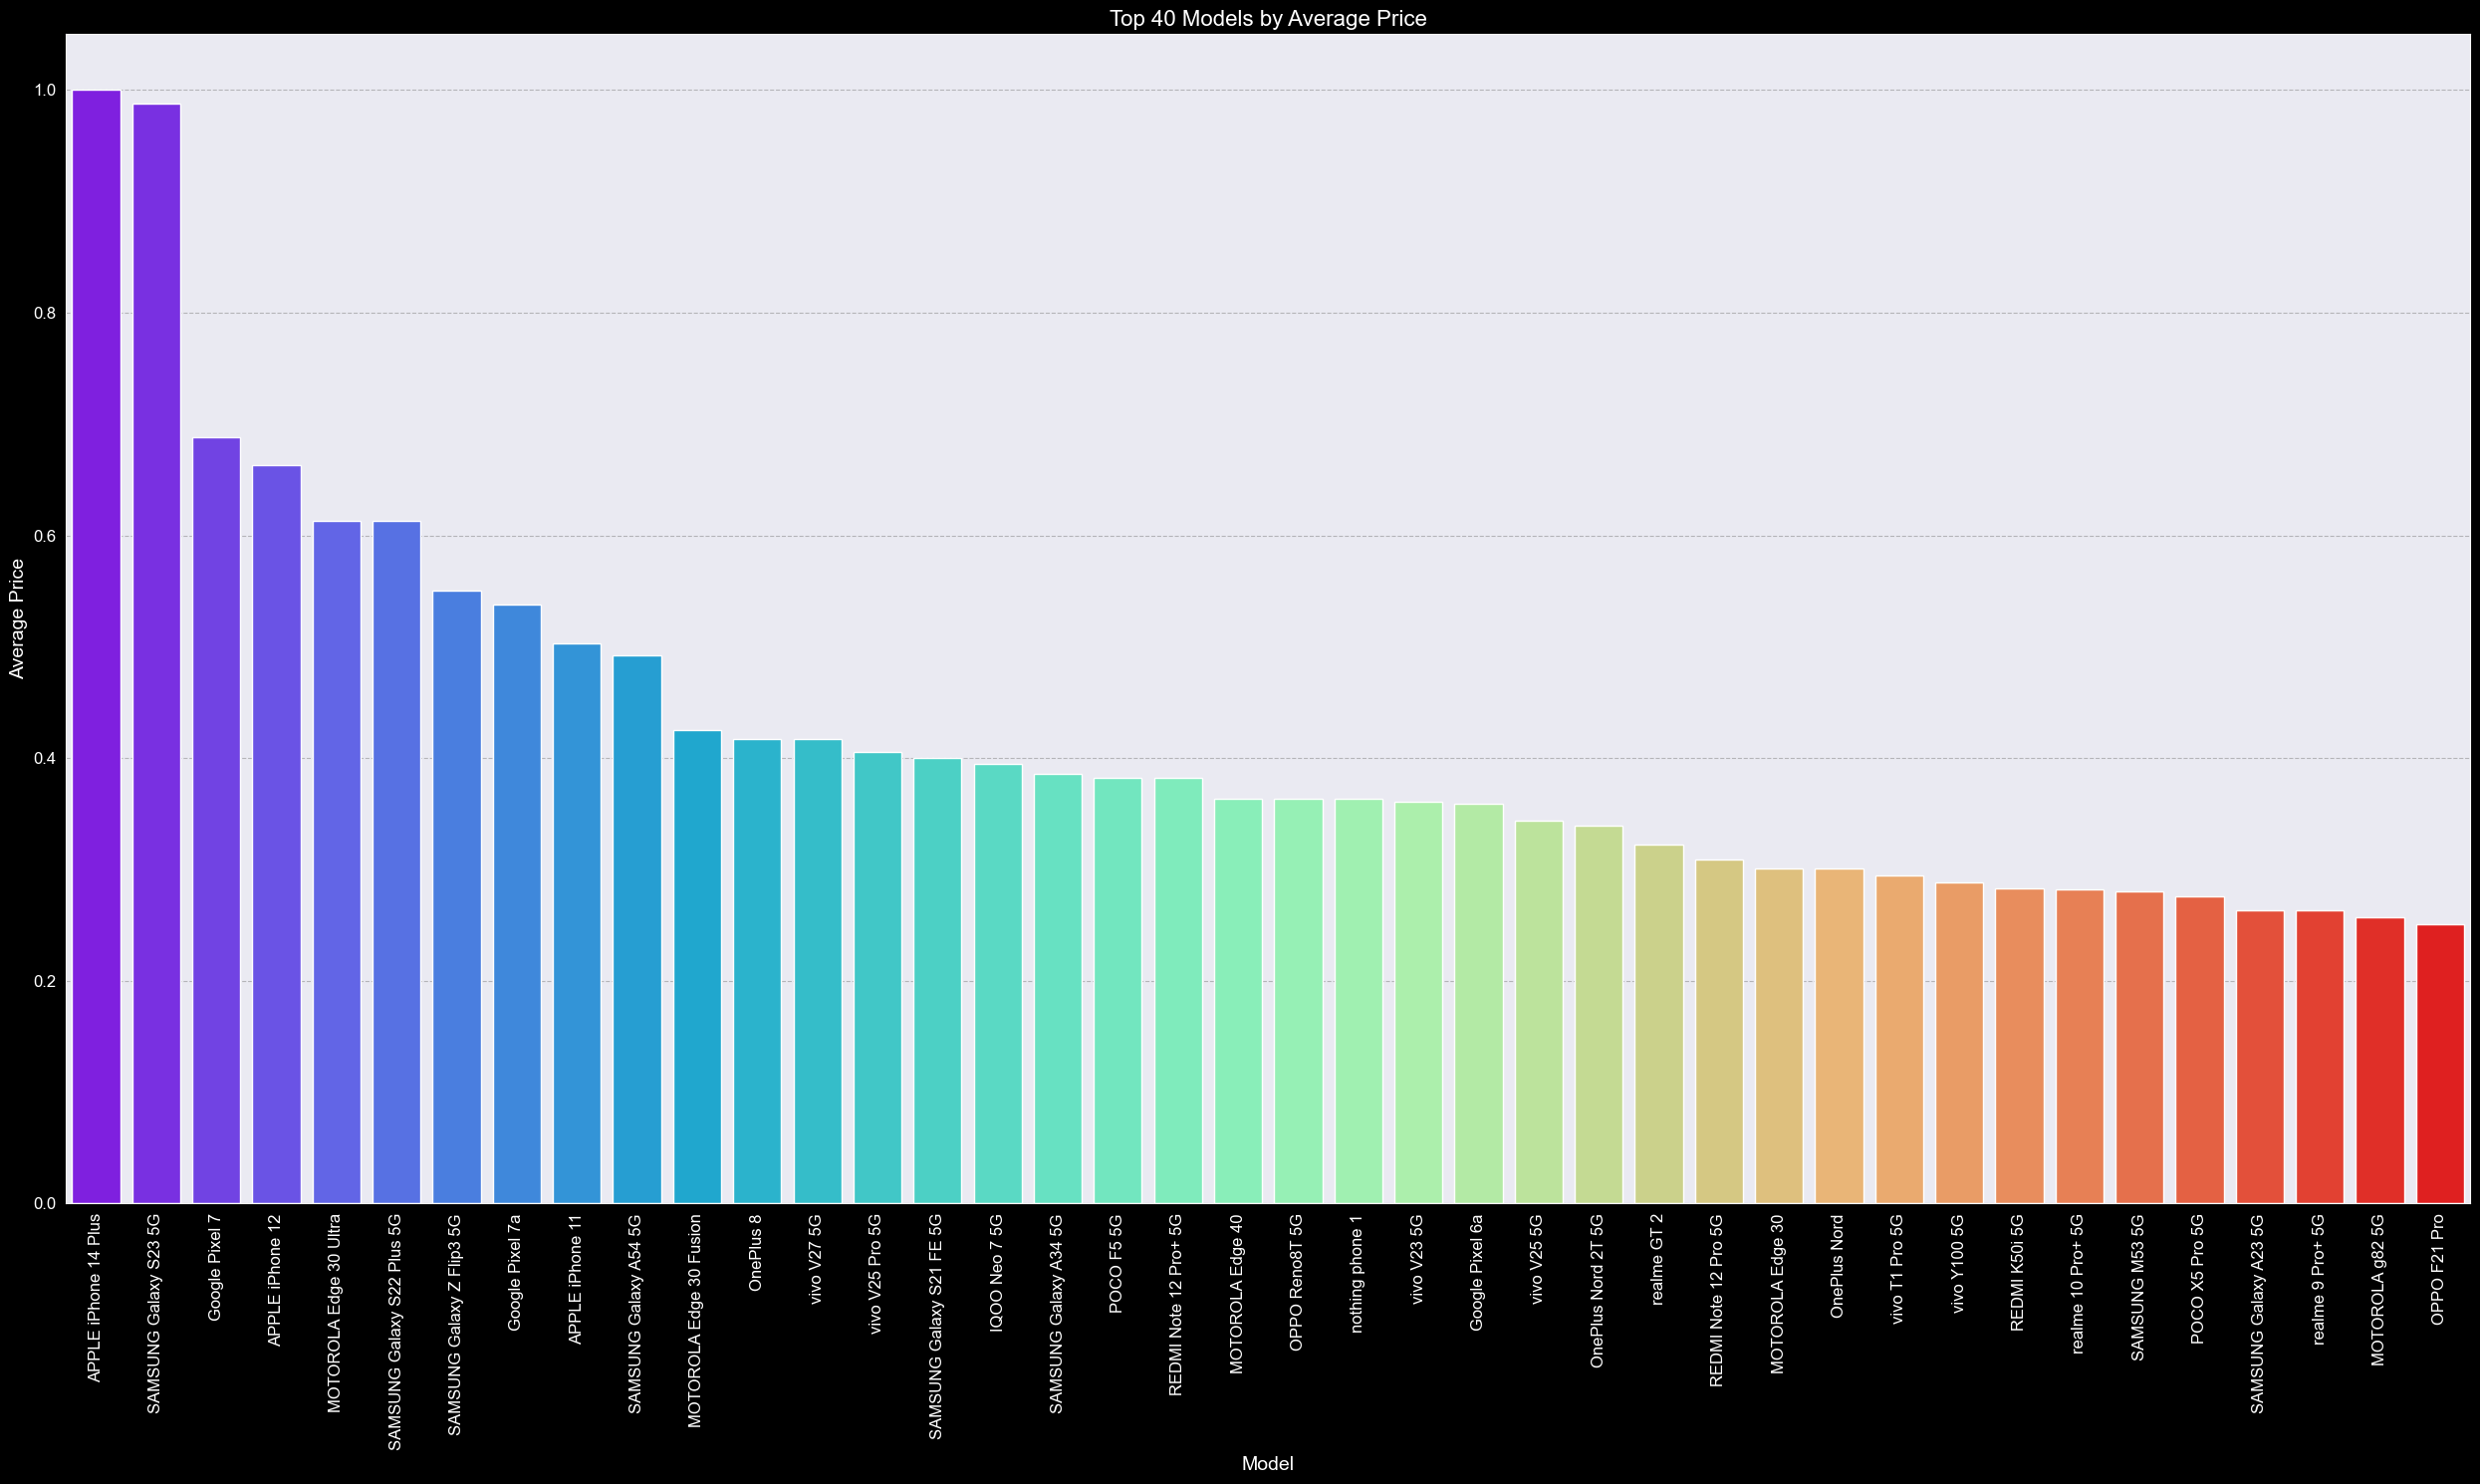

In [66]:
top_n = 40
avg_prices = data.groupby('Model')['Prize'].mean().reset_index().nlargest(top_n, 'Prize')

plt.style.use('dark_background')
plt.figure(figsize=(25, 15))
sns.set_style("darkgrid")  # Changed to darkgrid
cmap = plt.get_cmap('rainbow')  # Use a funky colormap
colors = [cmap(i) for i in np.linspace(0, 1, len(avg_prices))]
sns.barplot(x='Model', y='Prize', hue='Model', data=avg_prices, palette=colors, legend=False)

plt.xlabel('Model', fontsize=14, color='#ffffff')
plt.ylabel('Average Price', fontsize=14, color='#ffffff')
plt.title('Top {} Models by Average Price'.format(top_n), fontsize=16, color='#ffffff')
plt.xticks(rotation=90, fontsize=12, color='#ffffff')
plt.yticks(fontsize=12, color='#ffffff')
plt.grid(axis='y', linestyle='--', alpha=0.5, color='#808080')
plt.tight_layout()
plt.show()

Top 10 Mobile Models by Average Price:

1. APPLE iPhone 14 Plus: ₹80,999
2. SAMSUNG Galaxy S23 5G: ₹79,999
3. Google Pixel 7: ₹55,999
4. APPLE iPhone 12: ₹53,999
5. MOTOROLA Edge 30 Ultra: ₹49,999
6. SAMSUNG Galaxy S22 Plus 5G: ₹49,999
7. SAMSUNG Galaxy Z Flip3 5G: ₹44,999
8. Google Pixel 7a: ₹43,999
9. APPLE iPhone 11: ₹41,199
10. SAMSUNG Galaxy A54 5G: ₹40,332

Key Observations:

- Apple and Samsung dominate the top 10 list.
- Average prices range from ₹40,332 to ₹80,999.
- Samsung has 4 models in the top 10, Apple has 3, and Google has 2.
- Motorola's Edge 30 Ultra ranks 5th.


Using Isolation Forest algorithm to detect and remove outliers from the dataset.

In [67]:
from sklearn.ensemble import IsolationForest

numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

iso_forest = IsolationForest(contamination=0.1)

iso_forest.fit(data[numerical_cols])

predictions = iso_forest.predict(data[numerical_cols])

outlier_free_data = data[predictions == 1]

print("Original data shape:", data.shape)
print("Outlier-free data shape:", outlier_free_data.shape)

Original data shape: (541, 24)
Outlier-free data shape: (487, 24)


Isolation Forest model has successfully identified and removed 54 outliers from the original data.

Label encoding to transform the categorical Model variable into a numerical representation.

In [68]:
data['Model'] = le.fit_transform(data['Model'])

Feature Engineering :-

Creating new features by combining existing ones to provide more meaningful insights.

In [69]:
data['Total_Camera_Resolution'] = data['Rear Camera'] + data['Front Camera']

data['Total_Memory'] = data['Memory'] + data['RAM']

data['Battery_Life'] = data['Battery_'] / 1000 

In [70]:
data.drop(['Memory', 'RAM', 'Battery_', 'Front Camera', 'Rear Camera'], axis=1, inplace=True)

Here i tried multiple algorithms such as Linear Regression,Decision Trees,Random Forests,Gradient Boosting Models.I found that the Gradient Boosting Model performs the best, with an R² Score of 82%

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Set the random seed for reproducibility
random_state = 42
np.random.seed(random_state)

# Define features and target
X = data.drop('Prize', axis=1)
y = data['Prize']

# Initialize lists to store performance metrics
gb_mse_values = []
gb_mae_values = []
gb_r2_values = []

# Run the models multiple times and average the performance metrics
for i in range(10):
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    # Gradient Boosting
    gb_model = GradientBoostingRegressor(random_state=random_state)
    gb_model.fit(X_train, y_train)
    y_pred_gb = gb_model.predict(X_test)
    gb_mse = mean_squared_error(y_test, y_pred_gb)
    gb_mae = mean_absolute_error(y_test, y_pred_gb)
    gb_r2 = r2_score(y_test, y_pred_gb)
    gb_mse_values.append(gb_mse)
    gb_mae_values.append(gb_mae)
    gb_r2_values.append(gb_r2)

# Calculate the average performance metrics
gb_avg_mse = np.mean(gb_mse_values)
gb_avg_mae = np.mean(gb_mae_values)
gb_avg_r2 = np.mean(gb_r2_values)
print("\nGradient Boosting:")
print(f"MSE: {gb_avg_mse:.2f}")
print(f"MAE: {gb_avg_mae:.2f}")
print(f"R² Score: {gb_avg_r2:.2f}")


Gradient Boosting:
MSE: 0.00
MAE: 0.03
R² Score: 0.82


In [72]:
from skopt import gp_minimize
from skopt.space import Real, Integer, Categorical
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Set the random seed
np.random.seed(42)

space = [
    Real(0.01, 0.1, name='learning_rate'),
    Integer(3, 7, name='max_depth'),
    Integer(50, 200, name='n_estimators'),
    Integer(2, 10, name='min_samples_split'),
    Integer(1, 10, name='min_samples_leaf'),
    Categorical([0.5, 0.8, 1], name='subsample')
]

def objective(params):
    model = GradientBoostingRegressor(random_state=42, **dict(zip([param.name for param in space], params)))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return mean_squared_error(y_test, y_pred)

res_gp = gp_minimize(objective, space, n_calls=10, random_state=42)

best_params = dict(zip([param.name for param in space], res_gp.x))
best_model = GradientBoostingRegressor(random_state=42, **best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Best Score:", res_gp.fun)
print("Gradient Boosting Metrics:")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Best Hyperparameters: {'learning_rate': 0.09446974381141754, 'max_depth': np.int64(3), 'n_estimators': np.int64(199), 'min_samples_split': np.int64(7), 'min_samples_leaf': np.int64(7), 'subsample': 0.5}
Best Score: 0.0018075473056390094
Gradient Boosting Metrics:
MSE: 0.00
MAE: 0.03
R² Score: 0.80


After performing hyperparameter tuning using Bayesian optimization, we obtained the optimal parameters for our Gradient Boosting model:

- Best Hyperparameters: {'learning_rate': 0.09446974381141754, 'max_depth': np.int64(3), 'n_estimators': np.int64(199), 'min_samples_split': np.int64(7), 'min_samples_leaf': np.int64(7), 'subsample': 0.5}
- Best Score: 0.0018075473056390094

We then evaluated the best model on the test set, achieving the following metrics:

Gradient Boosting Metrics:

- Mean Squared Error (MSE): 0.00
- Mean Absolute Error (MAE): 0.03
- R² Score: 0.80

These results indicate that our optimized Gradient Boosting model performs well, with low errors and a respectable R² score.

Feature Importance :-

In [73]:
feature_names = data.drop('Prize', axis=1).columns

# Sort the features by their importance values
sorted_features = sorted(zip(feature_names, best_model.feature_importances_), key=lambda x: x[1], reverse=True)

# Print the sorted features
for feature, importance in sorted_features:
    print(f"{feature}: {importance:.4f}")

Model: 0.2989
Total_Memory: 0.2366
Battery_Life: 0.1843
Total_Camera_Resolution: 0.1379
Processor_: 0.0710
Mobile Height: 0.0633
Colour_Unknown: 0.0040
Colour_Black: 0.0037
Colour_Purple: 0.0002
Colour_Orange: 0.0001
Colour_Blue: 0.0001
Colour_Silver: 0.0001
AI Lens: 0.0000
Colour_Brown: 0.0000
Colour_Gold: 0.0000
Colour_Gray: 0.0000
Colour_Green: 0.0000
Colour_Other: 0.0000
Colour_Red: 0.0000
Colour_White: 0.0000
Colour_Yellow: 0.0000


1. Top 5 features: The top 5 features with the highest importance values are:
    - Model (0.2989)
    - Total_Memory (0.2366)
    - Battery_Life (0.1843)
    - Total_Camera_Resolution (0.1379)
    - Processor_ (0.0710)
These features are likely to have the most significant impact on the predicted prize values.
2. Moderately important features: The next few features with moderate importance values are:
    - Mobile Height (0.0633)
    - Colour_Unknown (0.0040)
    - Colour_Black (0.0037)
These features may still have some influence on the predicted prize values, but to a lesser extent.
3. Least important features: The remaining features have very low importance values, indicating that they may not have a significant impact on the predicted prize values. Some of these features may be redundant or irrelevant.

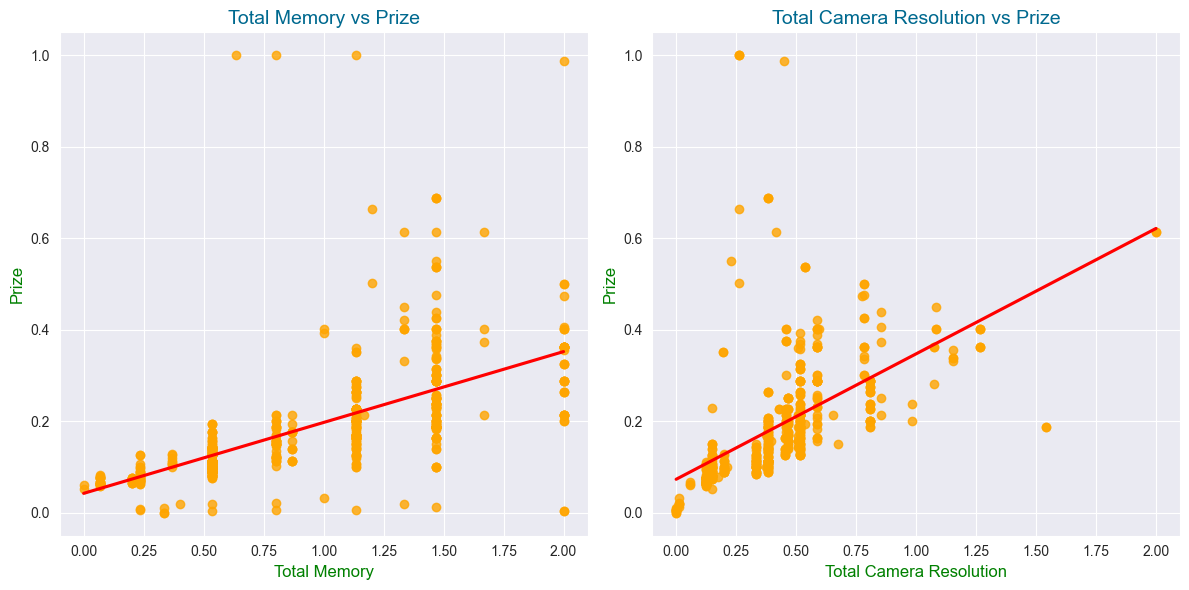

In [74]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot Total Memory vs Prize
sns.regplot(x='Total_Memory', y='Prize', data=data, ci=None, 
             scatter_kws={'color':'orange'}, line_kws={'color':'red'}, ax=axes[0])
axes[0].set_title('Total Memory vs Prize', fontsize=14, color='#00698f')
axes[0].set_xlabel('Total Memory', fontsize=12, color='#008000')
axes[0].set_ylabel('Prize', fontsize=12, color='#008000')
axes[0].tick_params(axis='x', labelsize=10)
axes[0].tick_params(axis='y', labelsize=10)

# Plot Total Camera Resolution vs Prize
sns.regplot(x='Total_Camera_Resolution', y='Prize', data=data, ci=None, 
             scatter_kws={'color':'orange'}, line_kws={'color':'red'}, ax=axes[1])
axes[1].set_title('Total Camera Resolution vs Prize', fontsize=14, color='#00698f')
axes[1].set_xlabel('Total Camera Resolution', fontsize=12, color='#008000')
axes[1].set_ylabel('Prize', fontsize=12, color='#008000')
axes[1].tick_params(axis='x', labelsize=10)
axes[1].tick_params(axis='y', labelsize=10)

# Layout so plots do not overlap
fig.tight_layout()
plt.show()

- The analysis reveals a positive correlation between Total Memory and Price, indicating that as the total memory of a device increases, its price also tends to increase. 
- Similarly, a positive correlation is observed between Total Camera Resolution and Price, suggesting that devices with higher camera resolution are generally more expensive. 
- This relationship is likely due to the increased cost of manufacturing devices with higher memory capacity and better camera quality.

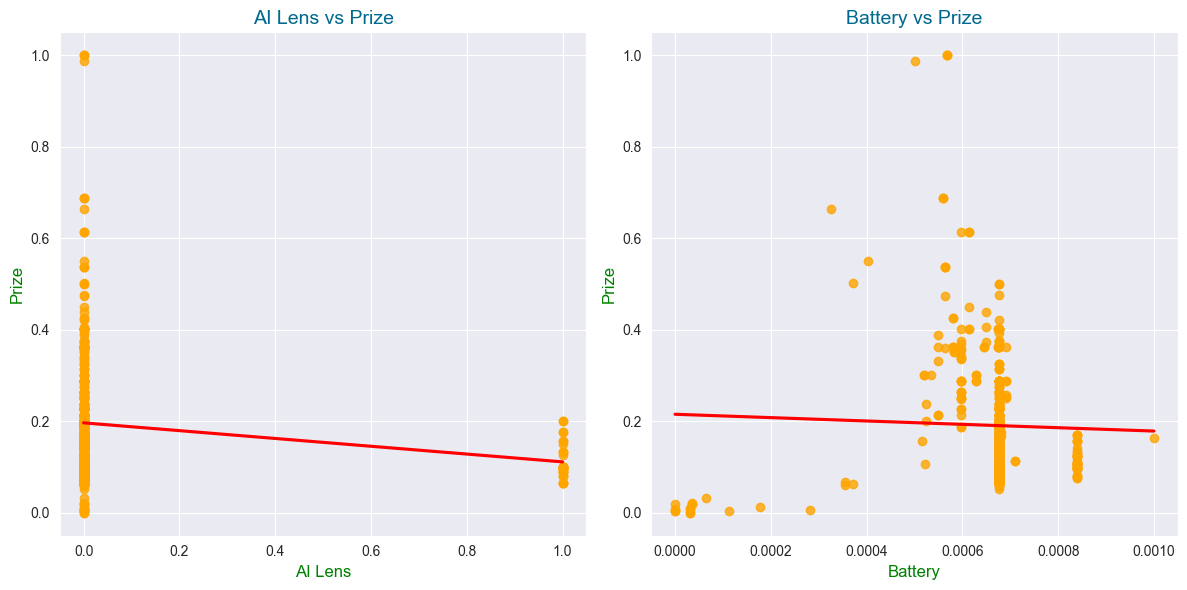

In [75]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot AI Lens vs Prize
sns.regplot(x='AI Lens', y='Prize', data=data, ci=None, 
             scatter_kws={'color':'orange'}, line_kws={'color':'red'}, ax=axes[0])
axes[0].set_title('AI Lens vs Prize', fontsize=14, color='#00698f')
axes[0].set_xlabel('AI Lens', fontsize=12, color='#008000')
axes[0].set_ylabel('Prize', fontsize=12, color='#008000')
axes[0].tick_params(axis='x', labelsize=10)
axes[0].tick_params(axis='y', labelsize=10)

# Plot Battery vs Prize
sns.regplot(x='Battery_Life', y='Prize', data=data, ci=None, 
             scatter_kws={'color':'orange'}, line_kws={'color':'red'}, ax=axes[1])
axes[1].set_title('Battery vs Prize', fontsize=14, color='#00698f')
axes[1].set_xlabel('Battery', fontsize=12, color='#008000')
axes[1].set_ylabel('Prize', fontsize=12, color='#008000')
axes[1].tick_params(axis='x', labelsize=10)
axes[1].tick_params(axis='y', labelsize=10)

# Layout so plots do not overlap
fig.tight_layout()
plt.show()

- The analysis also reveals a negative correlation between AI Lens and Price, indicating that devices with AI Lens tend to be less expensive. 
- Additionally, a negative correlation is observed between Battery Life and Price, suggesting that devices with longer battery life are generally less expensive.

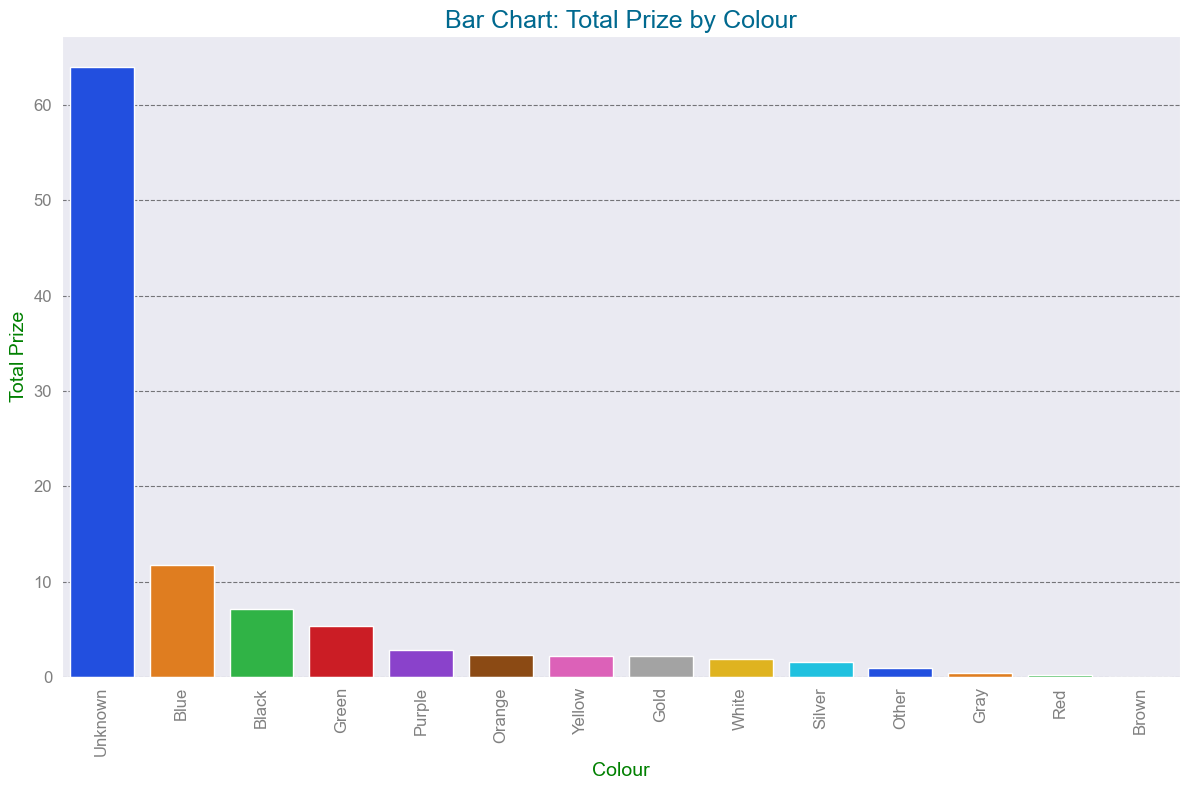

In [76]:
color_data = data.copy()

# Melt the data
color_data = pd.melt(color_data, id_vars='Prize', value_vars=[col for col in color_data.columns if 'Colour' in col])

# Filter out rows with 0 values
color_data = color_data[color_data['value'] == 1]

# Group by color and sum the prize values
prize_by_color = color_data.groupby('variable')['Prize'].sum().reset_index()

# Rename the 'variable' column to 'Colour'
prize_by_color = prize_by_color.rename(columns={'variable': 'Colour'})

# Replace 'Colour_' with '' in the 'Colour' column
prize_by_color['Colour'] = prize_by_color['Colour'].str.replace('Colour_', '')

# Sort the data in descending order
prize_by_color = prize_by_color.sort_values(by='Prize', ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Colour', y='Prize', hue='Colour', data=prize_by_color, palette='bright', legend=False)

# Customizations
plt.title('Bar Chart: Total Prize by Colour', fontsize=18, color='#00698f')
plt.xlabel('Colour', fontsize=14, color='#008000')
plt.ylabel('Total Prize', fontsize=14, color='#008000')
plt.xticks(rotation=90, fontsize=12, color='#808080')
plt.yticks(fontsize=12, color='#808080')
plt.grid(axis='y', linestyle='--', alpha=0.5, color='#000000')
plt.tight_layout()
plt.show()

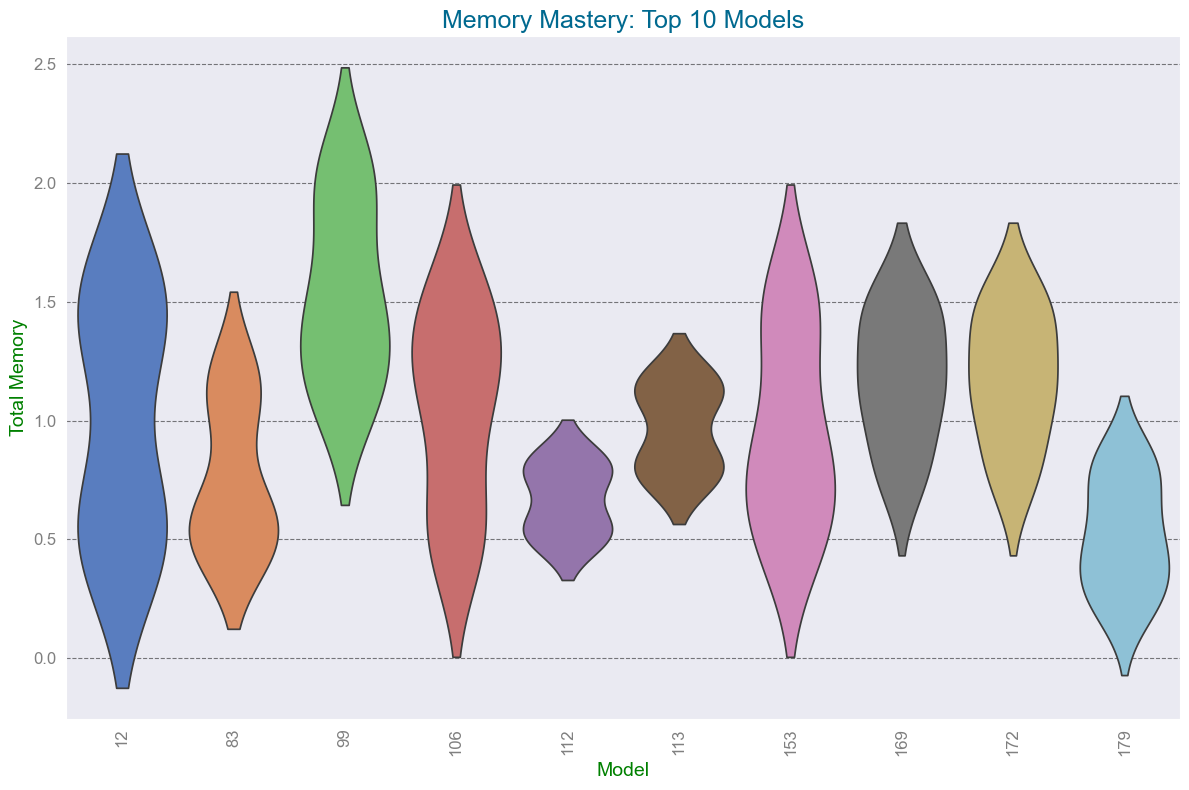

In [77]:
top_models = data['Model'].value_counts().head(10).index

filtered_data = data[data['Model'].isin(top_models)]

plt.figure(figsize=(12, 8))
sns.violinplot(
    x='Model', 
    y='Total_Memory', 
    hue='Model',  # Add hue parameter
    data=filtered_data, 
    palette='muted', 
    inner=None,
    legend=False  # Set legend to False
)

plt.title('Memory Mastery: Top 10 Models', fontsize=18, color='#00698f')
plt.xlabel('Model', fontsize=14, color='#008000')
plt.ylabel('Total Memory', fontsize=14, color='#008000')
plt.xticks(rotation=90, fontsize=12, color='#808080')
plt.yticks(fontsize=12, color='#808080')
plt.grid(axis='y', linestyle='--', alpha=0.5, color='#000000')
plt.tight_layout()
plt.style.use('dark_background')
plt.show()

1. Redmi Note 12 Pro 5G has the highest Total Memory: This model stands out from the rest with the highest Total Memory value.
2. Infinix HOT 30i,SAMSUNG Galaxy A14 5G,Realme C55 are close contenders: These models have high Total Memory values, indicating they are among the top models in terms of memory.
3. Mid-range models cluster around the middle: Models like Vivo T2X 5G, Vivo T1 44W, Redmi 10, Samsung Galaxy F14 5G, and Vivo Y16 have Total Memory values that cluster around the middle, indicating a grouping of mid-range models.
4. Samsung Galaxy F13 has the lowest Total Memory: This model has the lowest Total Memory value among all the models plotted.
----------------------------------------------------------------------------------------------
1. Memory is a key differentiator: The wide range of Total Memory values across models suggests that memory is an important factor in distinguishing between different models.
2. Mid-range models offer a balance: Models with moderate Total Memory values may offer a balance between memory and other features, making them attractive to consumers who want a well-rounded device.
3. High-end models prioritize memory: The high Total Memory values of models like Redmi Note 12 Pro 5G and Hot 30 suggest that these models prioritize memory as a key feature.

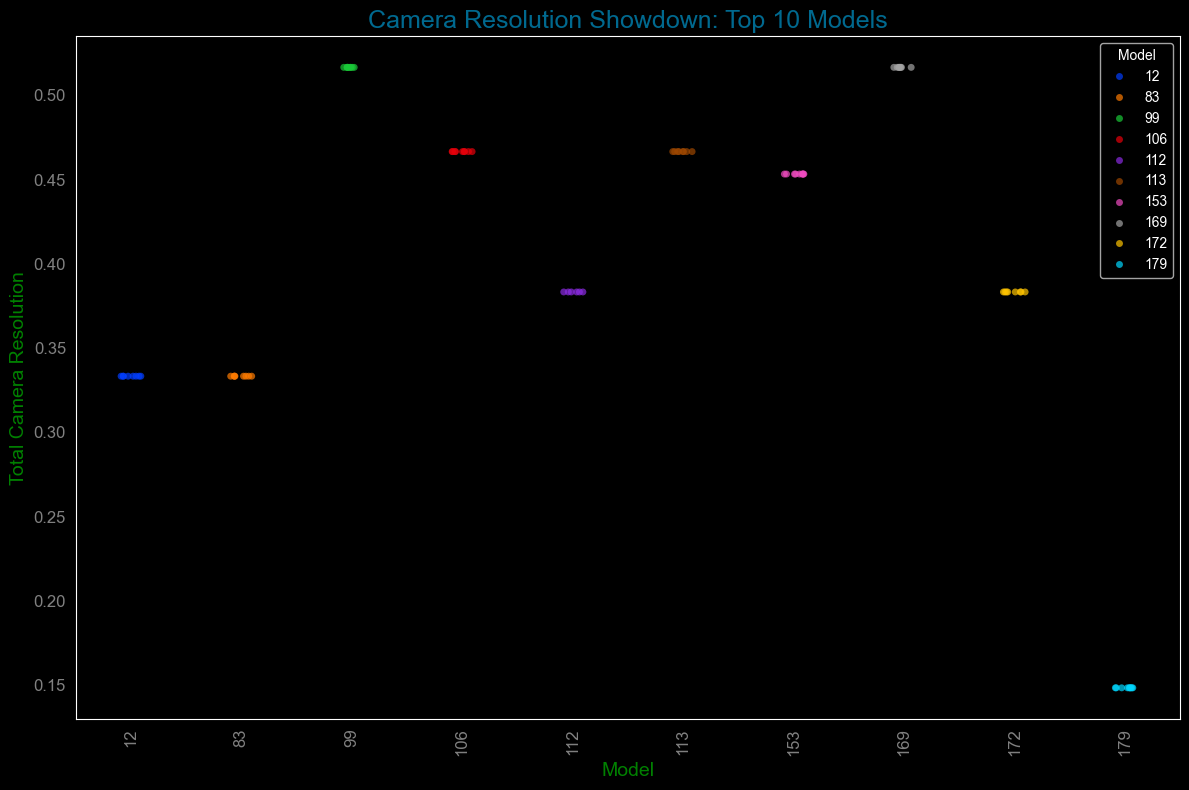

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 Models by Frequency
top_models = data['Model'].value_counts().head(10).index

# Filter Data to Top Models
filtered_data = data[data['Model'].isin(top_models)]

# Plot Configuration
plt.figure(figsize=(12, 8))
sns.stripplot(
    x='Model', 
    y='Total_Camera_Resolution', 
    hue='Model',  # Add hue parameter
    data=filtered_data, 
    jitter=True, 
    alpha=0.7, 
    palette='bright'
)

# Customizations
plt.title('Camera Resolution Showdown: Top 10 Models', fontsize=18, color='#00698f')
plt.xlabel('Model', fontsize=14, color='#008000')
plt.ylabel('Total Camera Resolution', fontsize=14, color='#008000')
plt.xticks(rotation=90, fontsize=12, color='#808080')
plt.yticks(fontsize=12, color='#808080')
plt.grid(axis='y', linestyle='--', alpha=0.5, color='#000000')
plt.tight_layout()
plt.style.use('dark_background')
plt.show()

1. Top-performing models: Redmi Note 12 Pro 5G and Vivo T1 44W have the highest camera resolutions.
2. Samsung's consistency: Samsung Galaxy F14 5G and Samsung Galaxy A14 5G have similar camera resolutions, ranking third and fourth, respectively.
3. Mid-range performers: Realme C55, Samsung Galaxy F13, and Vivo T2X 5G have moderate camera resolutions.
4. Lower-end models: Infinix Hot 30i, Redmi 10, and Vivo Y16 have lower camera resolutions, with Vivo Y16 being the lowest.

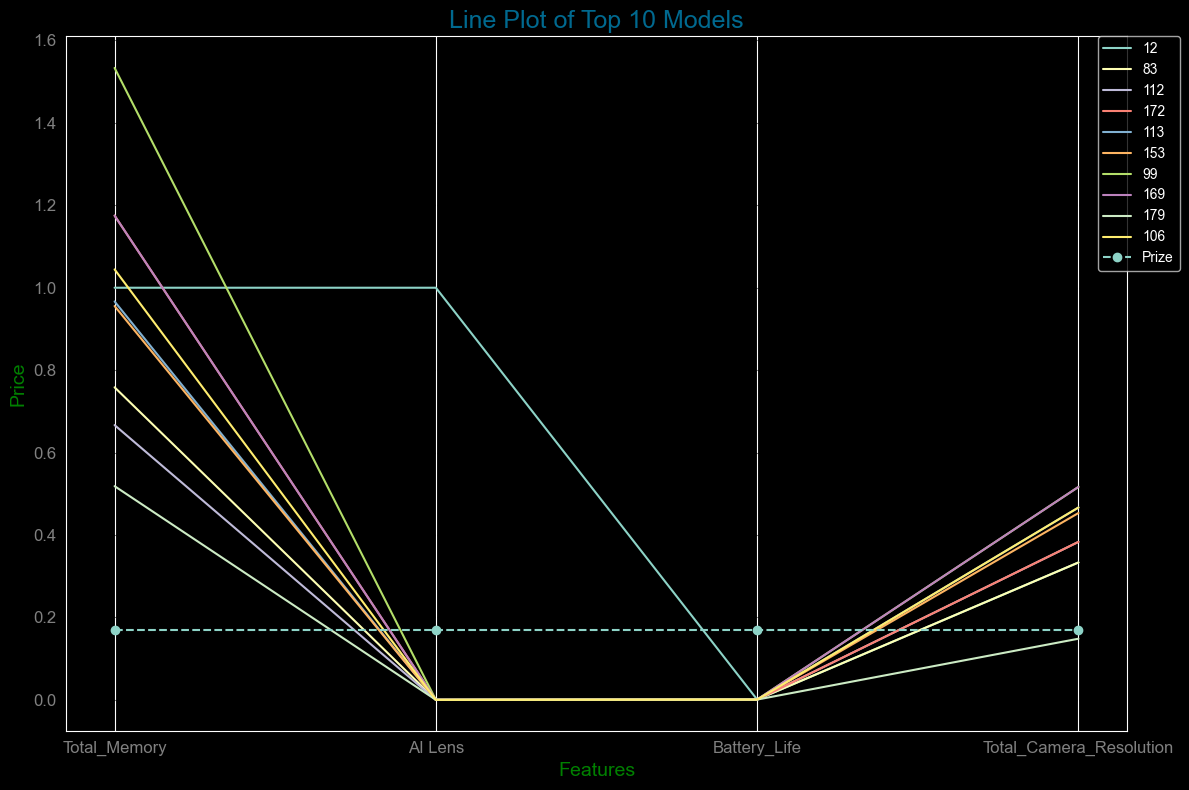

In [ ]:
import matplotlib.pyplot as plt

# Filter data to include only top 10 models with most observations
top_models = data['Model'].value_counts().head(10).index
filtered_data = data[data['Model'].isin(top_models)]

# Define numerical columns
numerical_cols = ['Total_Memory','AI Lens','Battery_Life','Total_Camera_Resolution']

# Create line plot
plt.figure(figsize=(12, 8))
for model in filtered_data['Model'].unique():
    model_data = filtered_data[filtered_data['Model'] == model]
    plt.plot(model_data[numerical_cols].mean(axis=0), label=model)

plt.plot([filtered_data['Prize'].mean()]*len(numerical_cols), label='Prize', marker='o', linestyle='--')

plt.title('Line Plot of Top 10 Models', fontsize=18, color='#00698f')
plt.xlabel('Features', fontsize=14, color='#008000')
plt.ylabel('Price', fontsize=14, color='#008000')
plt.xticks(fontsize=12, color='#808080')
plt.yticks(fontsize=12, color='#808080')
plt.grid(axis='y', linestyle='--', alpha=0.5, color='#000000')
plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tight_layout()
plt.show()

1. Total Memory is a key factor: The high prices for Total Memory across most models suggest that this feature is a significant contributor to the overall price of the device.

2. AI Lens is a cost-effective feature: The sudden drop in prices for AI Lens across most models implies that this feature is relatively cost-effective and may not be a major driver of the overall price.

3. Battery Life is a stable factor: The relatively stable prices for Battery Life across most models suggest that this feature is not a significant contributor to the overall price variability.

4. Total Camera Resolution drives up prices: The sudden increase in prices for Total Camera Resolution across most models implies that this feature is a significant driver of the overall price.

5. Infinix Hot 30i: The unique price pattern for the Infinix Hot 30i model suggests that it may have a different pricing strategy or feature set compared to the other models

----------------------------------------------------------------------------------------------